Explorartory Data Analysis for Ecommerce Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the datasets
customers = pd.read_csv('Customers.csv')
products = pd.read_csv('Products.csv')
transactions = pd.read_csv('Transactions.csv')

In [4]:
print(customers.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB
None


In [5]:
print(customers.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15


In [6]:
print("\nProducts Data:")
print(products.info())
print(products.head())


Products Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
None
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31


In [7]:
print("\nTransactions Data:")
print(transactions.info())
print(transactions.head())


Transactions Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB
None
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  

In [45]:
print("\nSummary Statistics for Transactions DataFrame:")
print(transactions.describe())


Summary Statistics for Transactions DataFrame:
          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


Check Missing values


In [8]:
print(customers.isnull().sum())

CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [9]:
print(products.isnull().sum())

ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


In [10]:
print(transactions.isnull().sum())

TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


MERGE DATA

In [36]:
merged_dataset = transactions.merge(customers, on='CustomerID', how='left')

In [37]:
print(merged_dataset.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price     CustomerName         Region  SignupDate  
0      300.68  300.68   Andrea Jenkins         Europe  2022-12-03  
1      300.68  300.68  Brittany Harvey           Asia  2024-09-04  
2      300.68  300.68  Kathryn Stevens         Europe  2024-04-04  
3      601.36  300.68  Travis Campbell  South America  2024-04-11  
4      902.04  300.68    Timothy Perez         Europe  2022-03-15  


In [38]:
merged_dataset = merged_dataset.merge(products, on='ProductID', how='left')

In [39]:
print(merged_dataset.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker

In [18]:
merged_dataset['SignupDate'] = pd.to_datetime(merged_dataset['SignupDate'])
merged_dataset['TransactionDate'] = pd.to_datetime(merged_dataset['TransactionDate'])

##Customer analysis with respect to region

In [21]:
print("\nCustomer Analysis:")
customer_region_counts = customers['Region'].value_counts()
print(customer_region_counts)


Customer Analysis:
Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


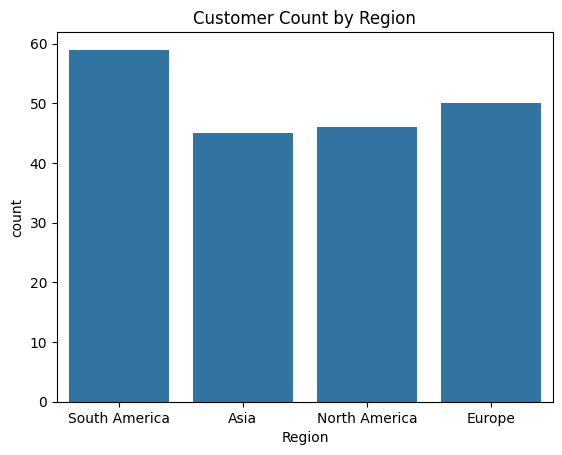

In [20]:
# Visualizations
sns.countplot(data=customers, x='Region')
plt.title('Customer Count by Region')
plt.show()

1. Regional Customer Distribution

In [22]:
print("\nCustomer Analysis:")
customer_region_counts = merged_dataset['Region'].value_counts()
print(customer_region_counts)


Customer Analysis:
Region
South America    304
North America    244
Europe           234
Asia             218
Name: count, dtype: int64


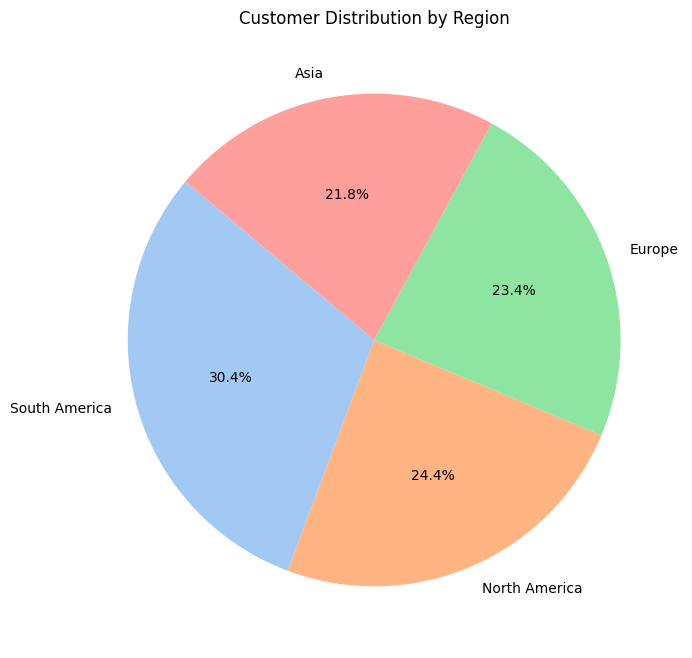

In [23]:
plt.figure(figsize=(8, 8))
customer_region_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Customer Distribution by Region')
plt.ylabel('')
plt.show()

2. Top Selling Products

In [24]:
print("\nProduct Analysis:")
product_sales = merged_dataset.groupby('ProductName')['Quantity'].sum().sort_values(ascending=False)
print(product_sales.head())


Product Analysis:
ProductName
ActiveWear Smartwatch    100
SoundWave Headphones      97
HomeSense Desk Lamp       81
ActiveWear Rug            79
SoundWave Cookbook        78
Name: Quantity, dtype: int64


3. Monthly Sales Trend

In [25]:
merged_dataset['TransactionMonth'] = merged_dataset['TransactionDate'].dt.to_period('M')


In [27]:
print("\nTransaction Analysis:")
monthly_sales = merged_dataset.groupby('TransactionMonth')['TotalValue'].sum()
print(monthly_sales)



Transaction Analysis:
TransactionMonth
2023-12     3769.52
2024-01    66376.39
2024-02    51459.27
2024-03    47828.73
2024-04    57519.06
2024-05    64527.74
2024-06    48771.18
2024-07    71366.39
2024-08    63436.74
2024-09    70603.75
2024-10    47063.22
2024-11    38224.37
2024-12    59049.20
Freq: M, Name: TotalValue, dtype: float64


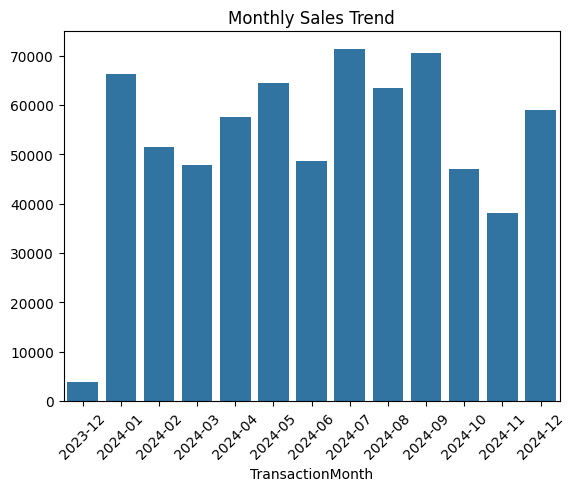

In [28]:
sns.barplot(x=monthly_sales.index.astype(str), y=monthly_sales.values)
plt.xticks(rotation=45)
plt.title('Monthly Sales Trend')
plt.show()

4. Price Distribution by Category

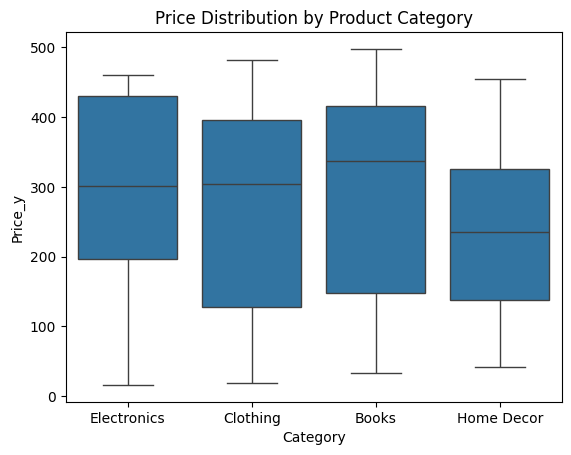

In [43]:
sns.boxplot(data=merged_dataset, x='Category', y='Price_y')
plt.title('Price Distribution by Product Category')
plt.show()

5. High-Value Customers

In [51]:
high_value_customers = merged_dataset.groupby('CustomerID')['TotalValue'].sum().sort_values(ascending=False)
top10_customers = high_value_customers.head(10)
top10_customers_details = pd.merge(top10_customers, customers[['CustomerID', 'CustomerName', 'Region']], on='CustomerID')
print(top10_customers_details)

  CustomerID  TotalValue          CustomerName         Region
0      C0141    10673.87          Paul Parsons         Europe
1      C0054     8040.39          Bruce Rhodes           Asia
2      C0065     7663.70          Gerald Hines  North America
3      C0156     7634.45         William Adams  North America
4      C0082     7572.91          Aimee Taylor  South America
5      C0188     7111.32             Anna Ball  South America
6      C0059     7073.28  Mrs. Kimberly Wright  North America
7      C0028     6819.57         Jennifer Pena           Asia
8      C0099     6715.72          Rodney Eaton  South America
9      C0165     6708.10         Juan Mcdaniel  South America


<ipython-input-52-bb9ac3b8d8ee>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CustomerName', y='TotalValue', data=top10_customers_details, palette='Blues_d')


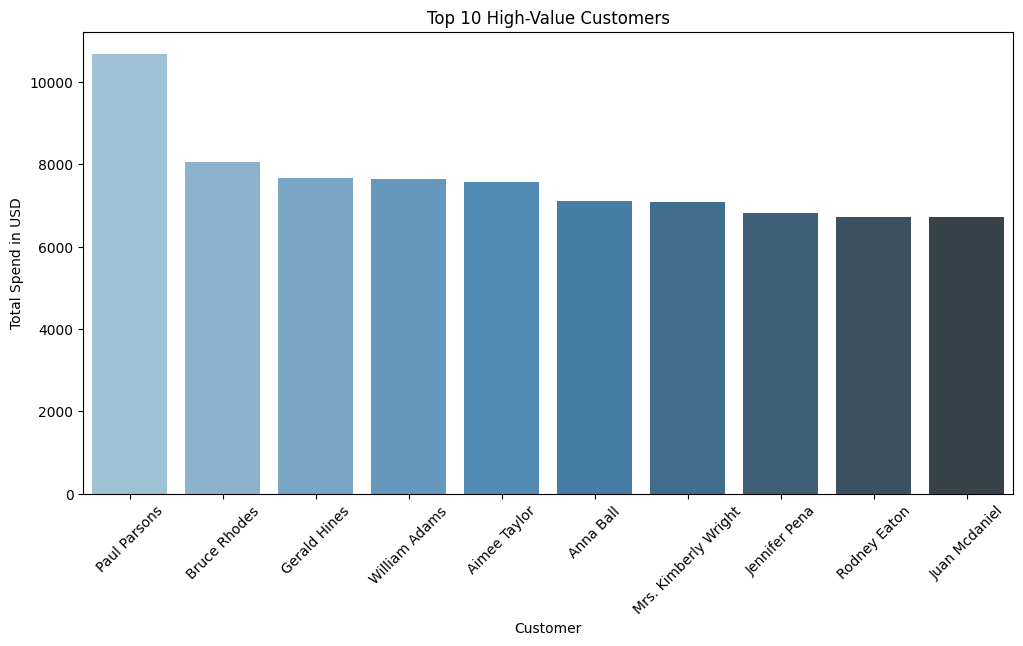

In [52]:
plt.figure(figsize=(12, 6))
sns.barplot(x='CustomerName', y='TotalValue', data=top10_customers_details, palette='Blues_d')
plt.title('Top 10 High-Value Customers')
plt.xlabel('Customer')
plt.ylabel('Total Spend in USD')
plt.xticks(rotation=45)
plt.show()

6. Customers with maximum transactions from all region

In [54]:
customer_spend_details = pd.merge(high_value_customers, merged_dataset[['CustomerID','CustomerName', 'Region']], on='CustomerID')
top_customer_per_region = customer_spend_details.loc[customer_spend_details.groupby('Region')['TotalValue'].idxmax()]
print(top_customer_per_region)

   CustomerID  TotalValue  CustomerName         Region
10      C0054     8040.39  Bruce Rhodes           Asia
0       C0141    10673.87  Paul Parsons         Europe
18      C0065     7663.70  Gerald Hines  North America
39      C0082     7572.91  Aimee Taylor  South America
